# Imports 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading the data 

In [2]:
online_news = pd.read_csv(r'C:\Users\Desktop\Capstone 2_OnlinePopularity\newspopularity.csv')

# Exploring the Data

In [3]:
online_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     39644 non-null  int64  
 1   url                            39644 non-null  object 
 2   timedelta                      39644 non-null  float64
 3   n_tokens_title                 39644 non-null  float64
 4   n_tokens_content               39644 non-null  float64
 5   n_unique_tokens                39644 non-null  float64
 6   n_non_stop_words               39644 non-null  float64
 7   n_non_stop_unique_tokens       39644 non-null  float64
 8   num_hrefs                      39644 non-null  float64
 9   num_self_hrefs                 39644 non-null  float64
 10  num_imgs                       39644 non-null  float64
 11  num_videos                     39644 non-null  float64
 12  average_token_length           39644 non-null 

In [4]:
online_news.head()

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"['January 7, 2013']"
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"['January 7, 2013']"
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"['January 7, 2013']"
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"['January 7, 2013']"
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"['January 7, 2013']"


In [5]:
online_np = online_news.drop(['Unnamed: 0'],axis=1)

In [6]:
online_np.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

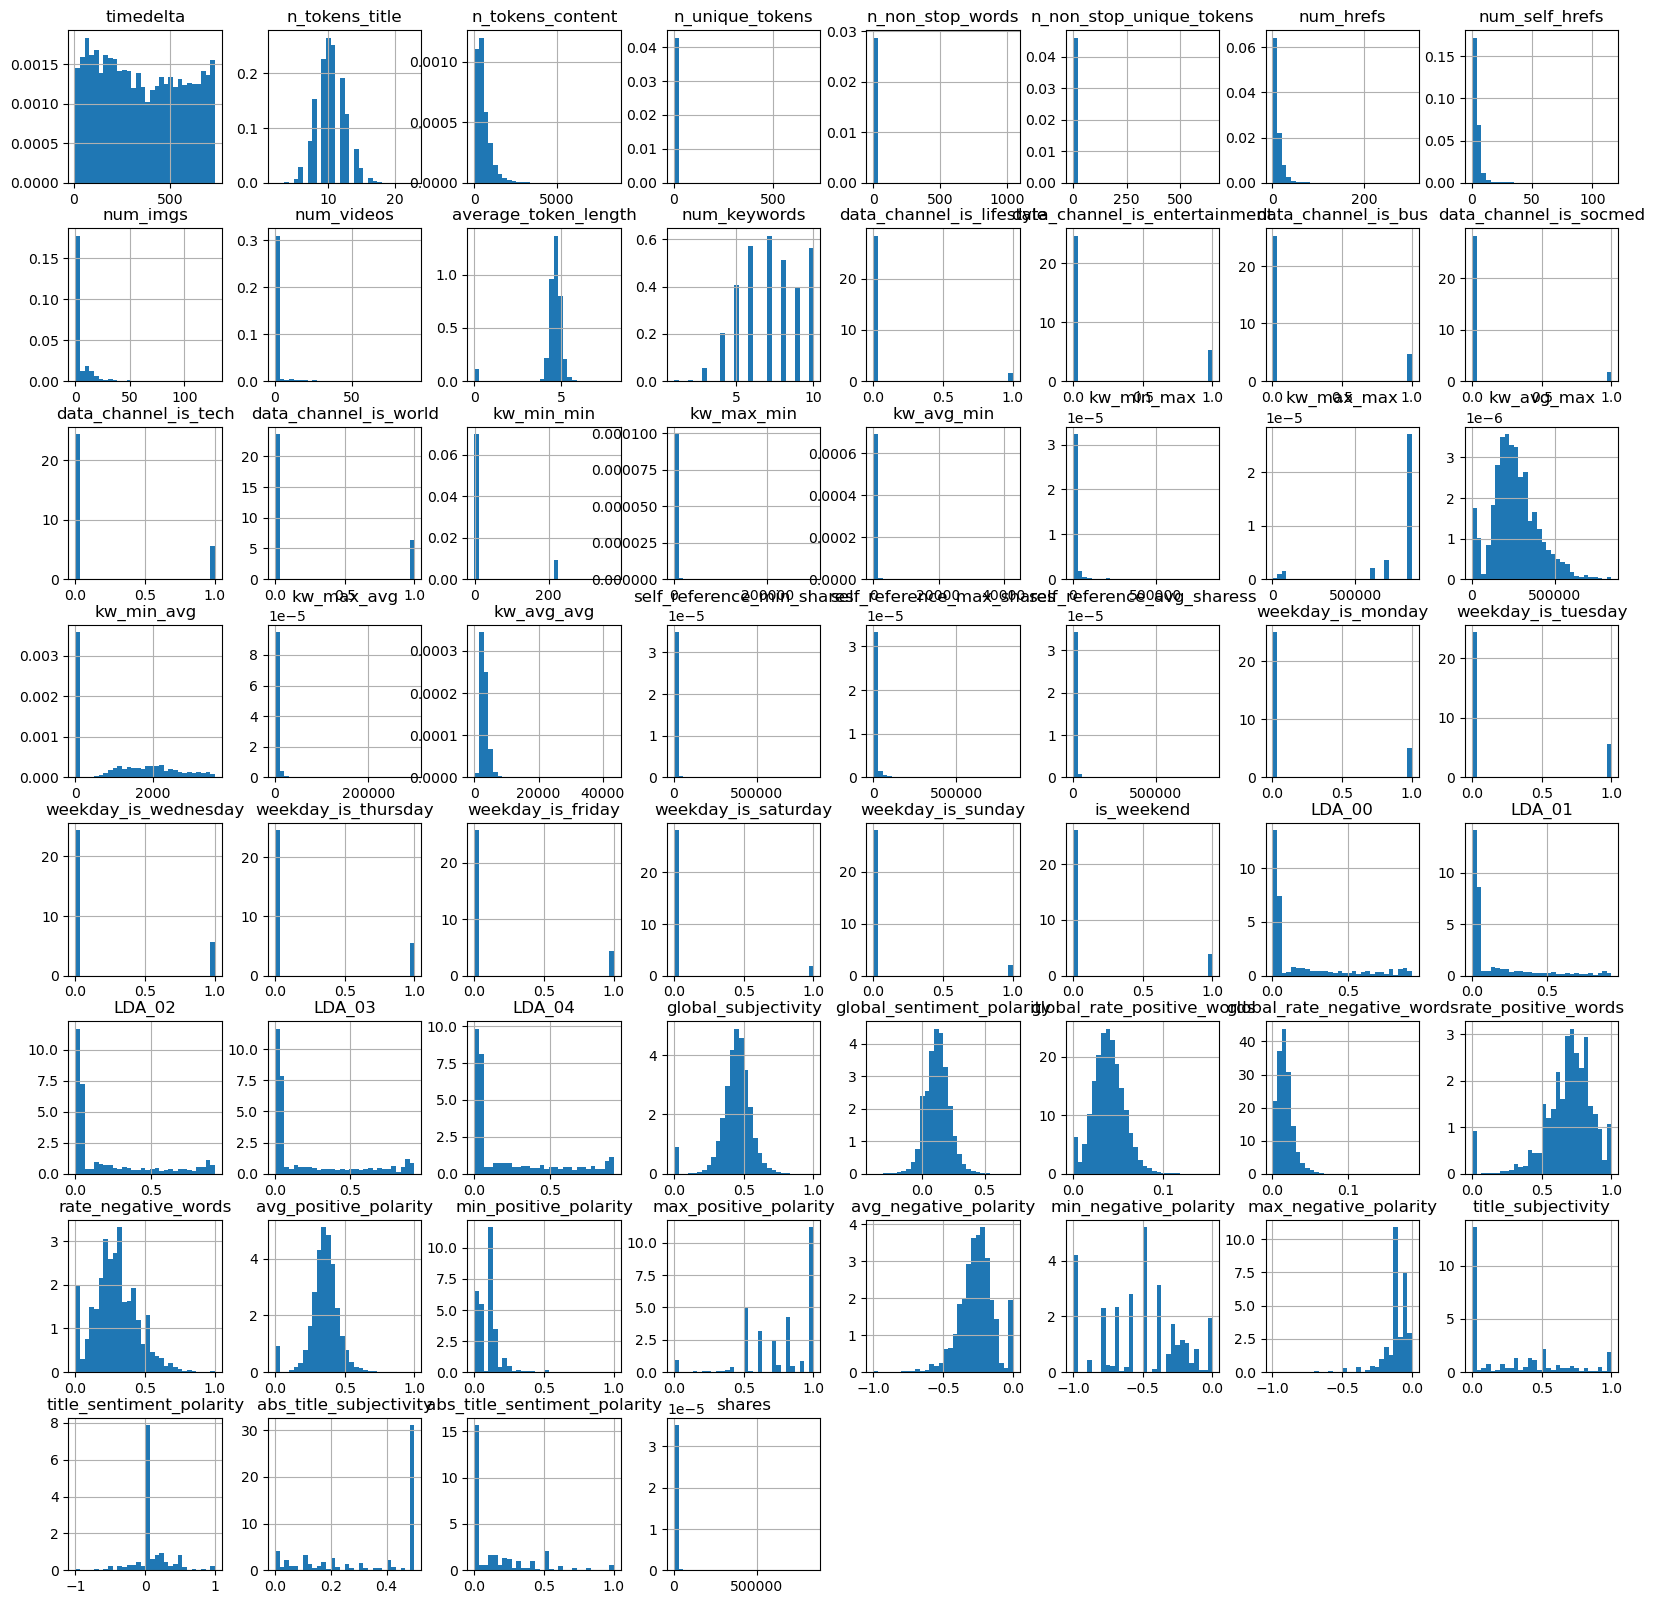

In [7]:
online_np.hist(bins=30, figsize=(20,20), density=True)
plt.show()

/var/folders/z1/81cr3rxx5qs6dmmnmx51cg9h0000gn/T/ipykernel_65384/1291216694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = online_np.corr()


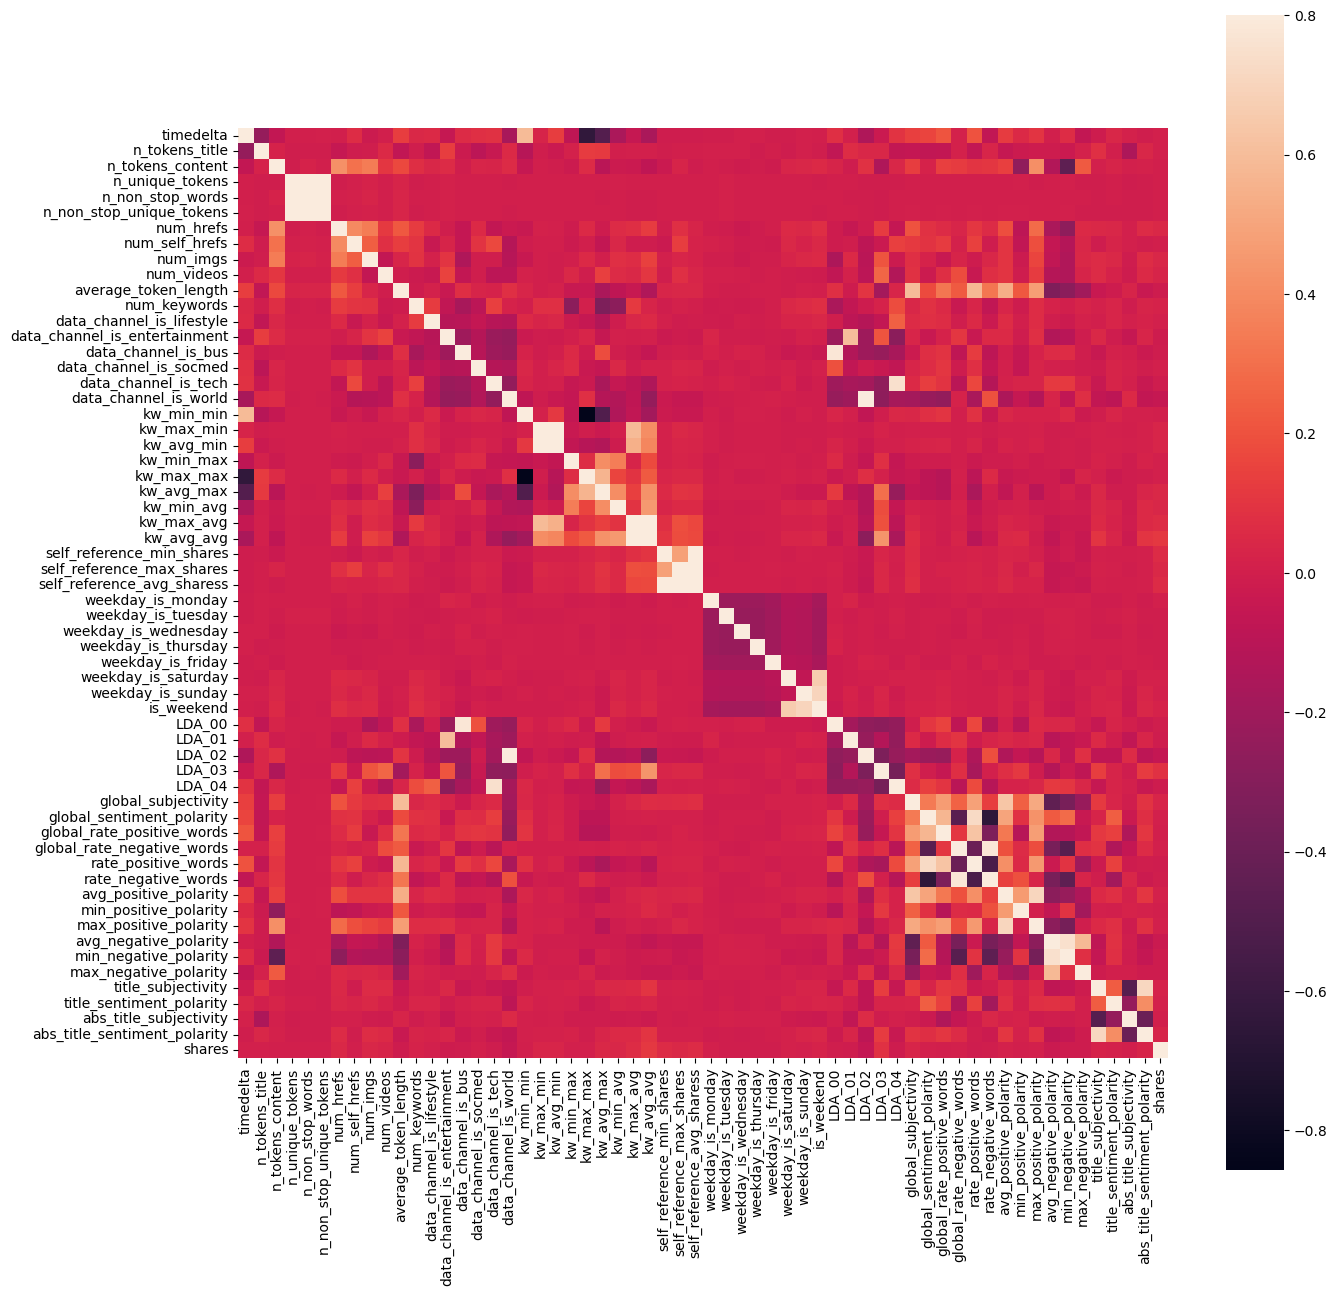

In [8]:
# Heatmap
corr = online_np.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

### Article Shares 

In [9]:
article_shares = online_np['shares']
article_shares

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [10]:
article_shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [11]:
# Article share Mean 
print('Article share mean:', article_shares.mean())

Article share mean: 3395.3801836343455


In [12]:
# Articel share Median 
print('Article share median:', article_shares.median())

Article share median: 1400.0


In [13]:
# Quantiles 
online_np['shares'].quantile(q=[.1, .2, .3, .4, .5, .6, .7, .8, .9,1.0])

0.1       708.0
0.2       870.6
0.3      1000.0
0.4      1200.0
0.5      1400.0
0.6      1800.0
0.7      2300.0
0.8      3400.0
0.9      6200.0
1.0    843300.0
Name: shares, dtype: float64

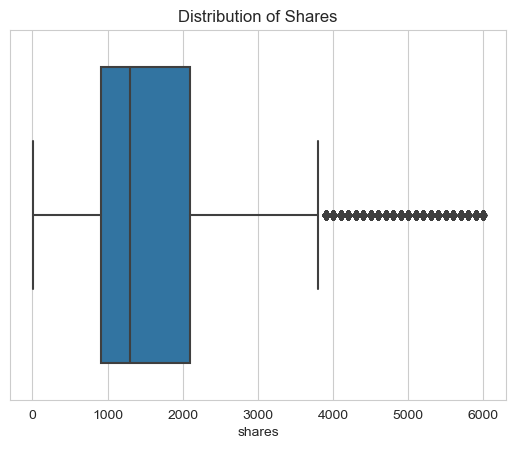

In [14]:
# Boxplot: Distribution of Shares 
sns.set_style('whitegrid')
sns.boxplot(x=online_np[online_np['shares'] <=6000]['shares']).set(title="Distribution of Shares");

### Day of Week Article Published 

In [15]:
# Obtaining Columns 
published_day = online_np.columns.values[31:38]
published_day

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

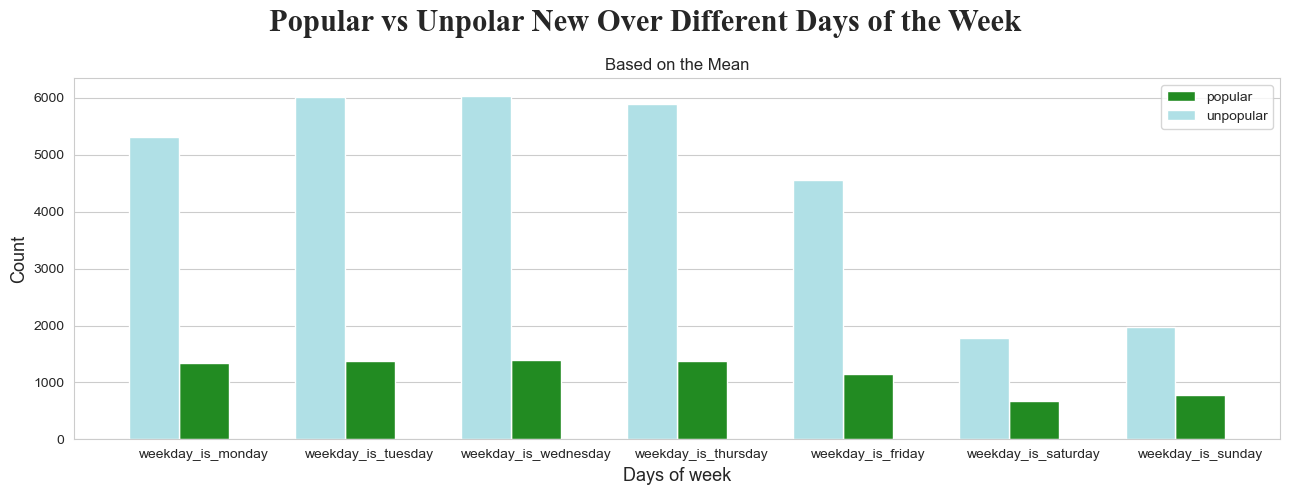

In [16]:
# Bar Graph: Weekday Popularity (based on mean)

#Unpoplar articles 
unp= online_np[online_np['shares']<3395.4]
#Popular articles 
p = online_np[online_np['shares']>=3395.4]

unp_day = unp[published_day].sum().values
p_day = p[published_day].sum().values

fig = plt.figure(figsize = (13,5))
plt.grid(axis='x')
plt.suptitle("Popular vs Unpolar New Over Different Days of the Week", fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.title('Based on the Mean')
plots = plt.bar(np.arange(len(published_day)), p_day, width = 0.3, align="center", color = 'forestgreen', \
          label = "popular")
plots = plt.bar(np.arange(len(published_day)) - 0.3, unp_day, width = 0.3, align = "center", color = 'powderblue', \
          label = "unpopular")
plt.xticks(np.arange(len(published_day)), published_day)


plt.ylabel("Count", fontsize = 13)
plt.xlabel("Days of week", fontsize = 13)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# add annotation to bar 

### Genre of Article 

In [17]:
channels = online_np.columns.values[14:19]
channels

array(['data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'], dtype=object)

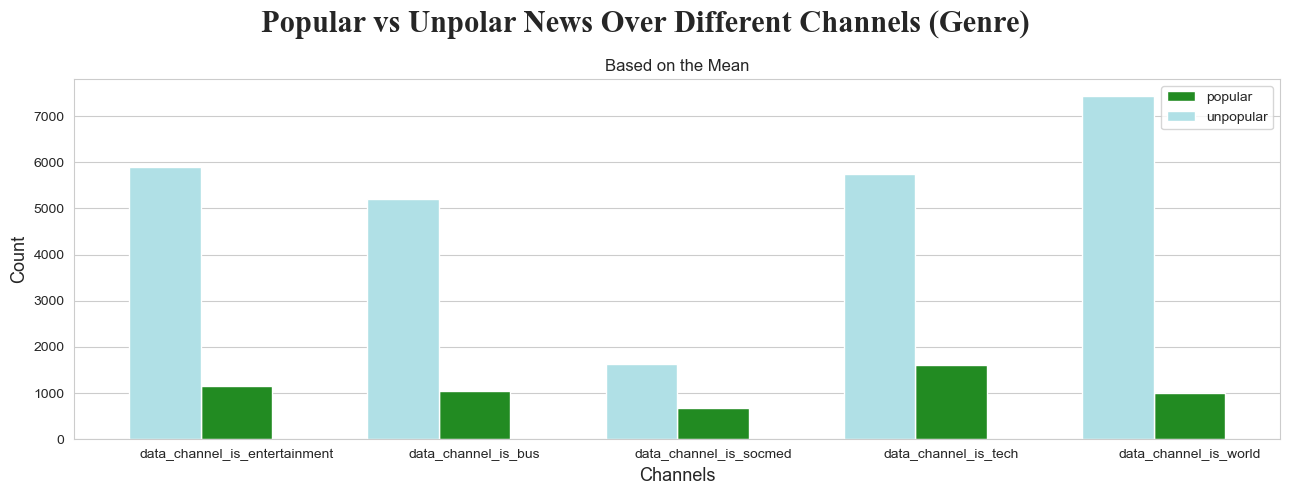

In [18]:
# Bar Graph: Different Channels Based on the Mean

#Unpoplar articles 
unp= online_np[online_np['shares']<3395.4]
#Popular articles 
p = online_np[online_np['shares']>=3395.4]

unp_day = unp[channels].sum().values
p_day = p[channels].sum().values

fig = plt.figure(figsize = (13,5))
plt.grid(axis='x')
plt.suptitle("Popular vs Unpolar News Over Different Channels (Genre)", fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.title("Based on the Mean")
plt.bar(np.arange(len(channels)), p_day, width = 0.3, align="center", color = 'forestgreen', \
          label = "popular")
plt.bar(np.arange(len(channels)) - 0.3, unp_day, width = 0.3, align = "center", color = 'powderblue', \
          label = "unpopular")
plt.xticks(np.arange(len(channels)), channels)
plt.ylabel("Count", fontsize = 13)
plt.xlabel("Channels", fontsize = 13)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Context of Articles 

#### i. Number of words in content (article)

In [19]:
# Removing articles with no words 
num_words = online_np[online_np['n_tokens_content']==0].index
print('Articles with no word:',num_words.size)

Articles with no word: 1181


In [20]:
# Dropping rows with articles that have no words 
online_np = online_np[online_np['n_tokens_content'] != 0]

Text(0.5, 1.0, 'Words per Content')

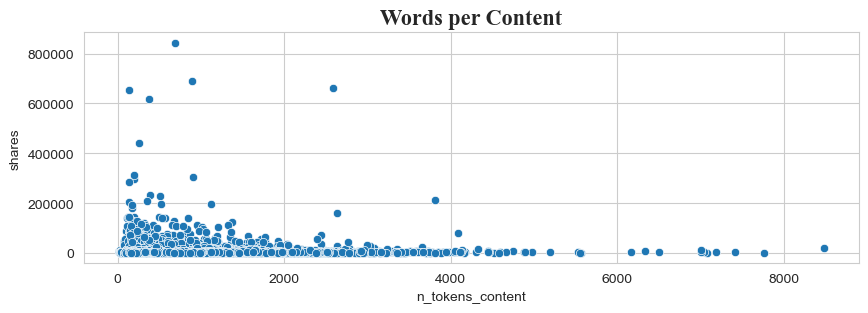

In [21]:
# Scatterplot: # of words in content per #nof shares
plt.figure(figsize=(10,3))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=online_np)
plt.title('Words per Content',fontname="Times New Roman", fontweight="bold", fontsize=16)

#### ii. Number Words in Title 

Text(0.5, 1.0, 'Words per Title')

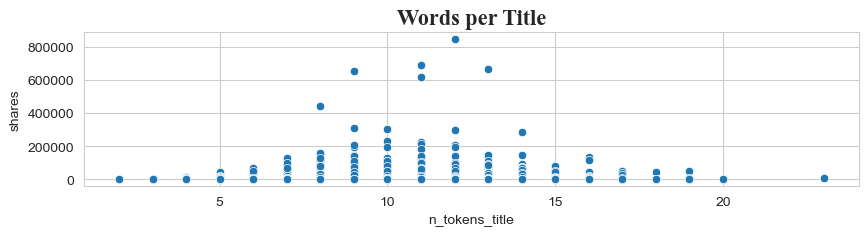

In [22]:
# Scatterplot: # of words in title per # of shares
plt.figure(figsize=(10,2))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=online_np)
plt.title('Words per Title',fontname="Times New Roman", fontweight="bold", fontsize=16)

#### iii. Number of images 

Text(0.5, 1.0, 'Number of Images')

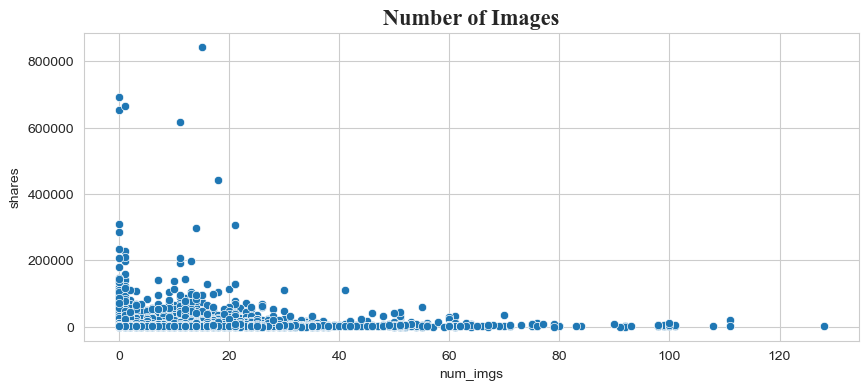

In [23]:
# Scatterplot: # of images in content vs # of shares
plt.figure(figsize=(10,4))
ax = sns.scatterplot(y='shares', x='num_imgs', data=online_np)
plt.title('Number of Images',fontname="Times New Roman", fontweight="bold", fontsize=16)

#### iv. Number of videos 

Text(0.5, 1.0, 'Number of Videos')

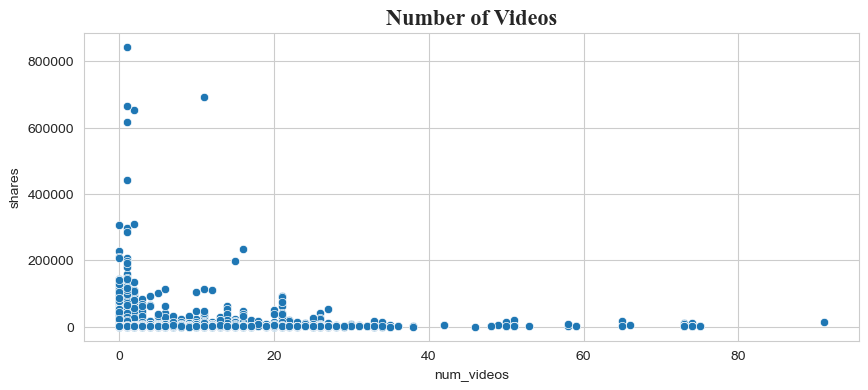

In [24]:
#Number of videos in the content vs Number of shares
plt.figure(figsize=(10,4))
ax = sns.scatterplot(y='shares', x='num_videos', data= online_np)
plt.title('Number of Videos',fontname="Times New Roman", fontweight="bold", fontsize=16)

### Date Article Published 

In [25]:
print (type(online_np.loc[0, 'DatePublished']))

<class 'str'>


In [26]:
online_np['DatePublished']

0          ['January 7, 2013']
1          ['January 7, 2013']
2          ['January 7, 2013']
3          ['January 7, 2013']
4          ['January 7, 2013']
                 ...          
39639    ['December 27, 2014']
39640    ['December 27, 2014']
39641    ['December 27, 2014']
39642    ['December 27, 2014']
39643    ['December 27, 2014']
Name: DatePublished, Length: 38463, dtype: object

In [27]:
online_np['DatePublished'] = online_np['DatePublished'].str.strip('[]')
online_np['DatePublished']

0          'January 7, 2013'
1          'January 7, 2013'
2          'January 7, 2013'
3          'January 7, 2013'
4          'January 7, 2013'
                ...         
39639    'December 27, 2014'
39640    'December 27, 2014'
39641    'December 27, 2014'
39642    'December 27, 2014'
39643    'December 27, 2014'
Name: DatePublished, Length: 38463, dtype: object

In [28]:
online_np.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"'January 7, 2013'"
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"'January 7, 2013'"
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"'January 7, 2013'"
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"'January 7, 2013'"
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"'January 7, 2013'"


Text(0.5, 1.0, 'January 2013')

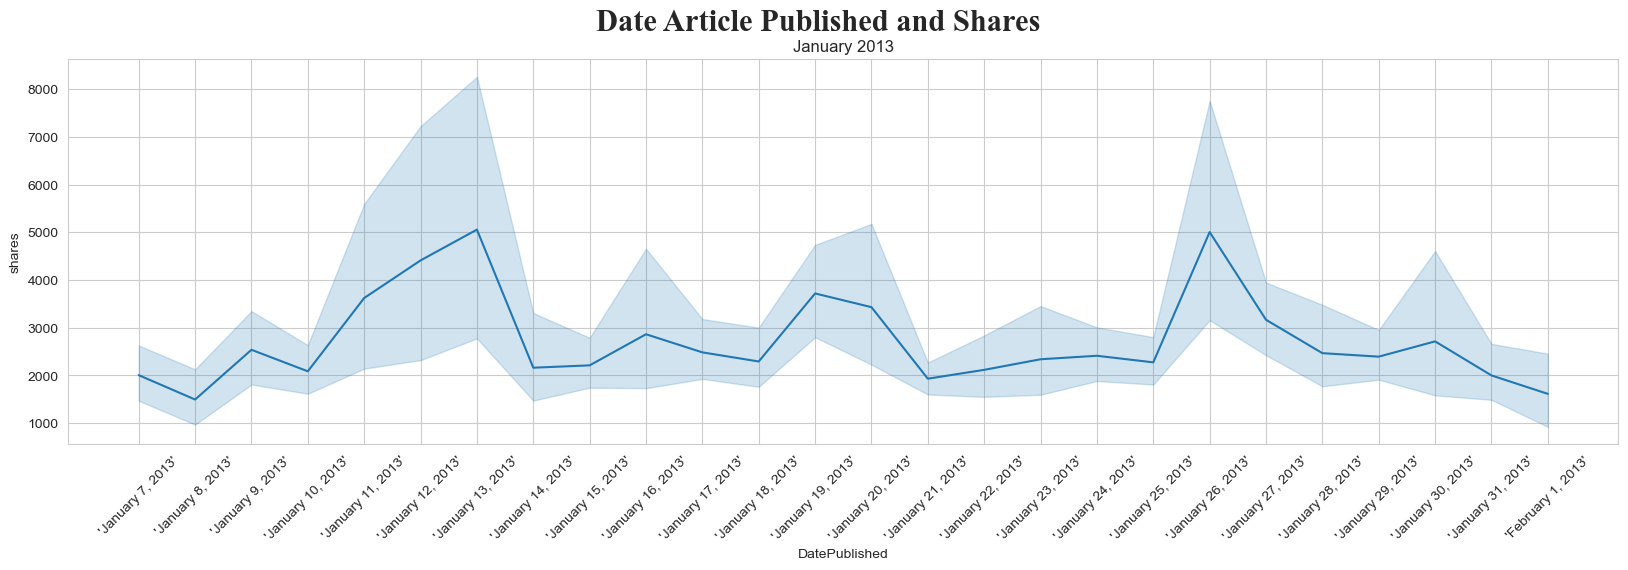

In [29]:
# Lineplot: Date Article Publihed per Shares 
# Jan 2013
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='DatePublished', y='shares', data=online_np[:1484])
plt.xticks(rotation=45)
plt.suptitle('Date Article Published and Shares', fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.title('January 2013')

Text(0.5, 1.0, 'January 2014')

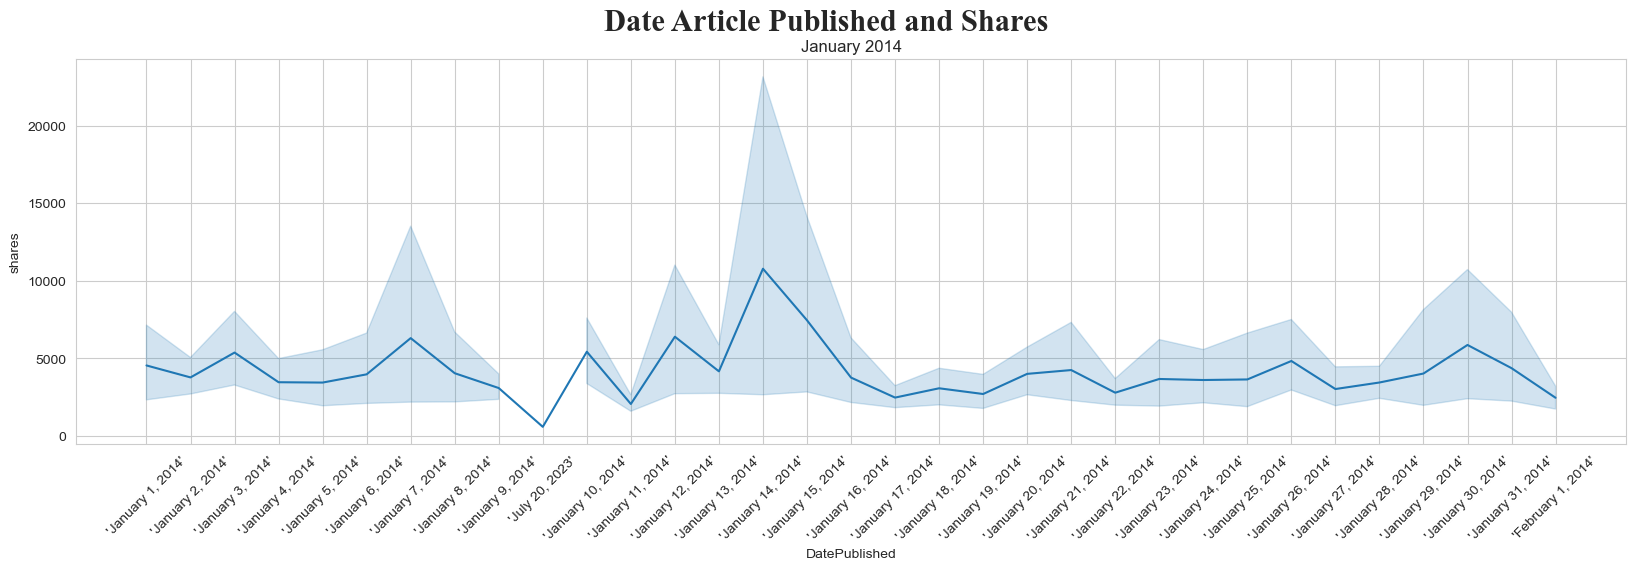

In [30]:
# Lineplot: Date Article Publihed per Shares 
# Jan 2014
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='DatePublished', y='shares', data=online_np[18085:19600])
plt.xticks(rotation=45)
plt.suptitle('Date Article Published and Shares', fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.title('January 2014')

### LDA

In [31]:
lda = online_np.columns.values[39:43]
lda

array(['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03'], dtype=object)

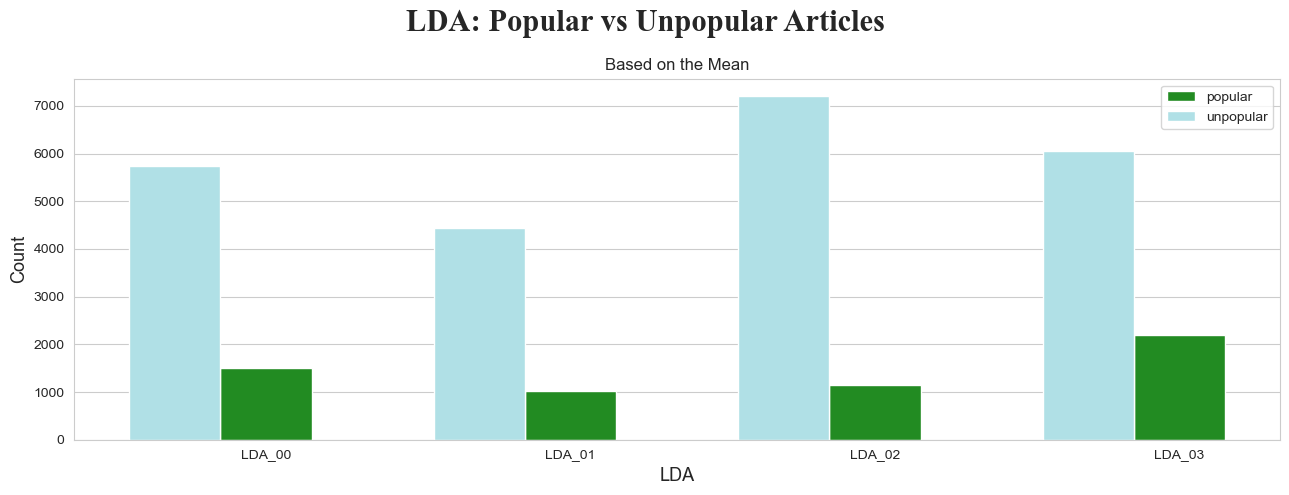

In [32]:
#Unpoplar articles 
unp= online_np[online_np['shares']<3395.4]
#Popular articles 
p = online_np[online_np['shares']>=3395.4]

unp_day = unp[lda].sum().values
p_day = p[lda].sum().values

fig = plt.figure(figsize = (13,5))
plt.grid(axis='x')
plt.suptitle("LDA: Popular vs Unpopular Articles", fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.title('Based on the Mean')
plt.bar(np.arange(len(lda)), p_day, width = 0.3, align="center", color = 'forestgreen', \
          label = "popular")
plt.bar(np.arange(len(lda)) - 0.3, unp_day, width = 0.3, align = "center", color = 'powderblue', \
          label = "unpopular")
plt.xticks(np.arange(len(lda)), lda)
plt.ylabel("Count", fontsize = 13)
plt.xlabel("LDA", fontsize = 13)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Article Polarity 

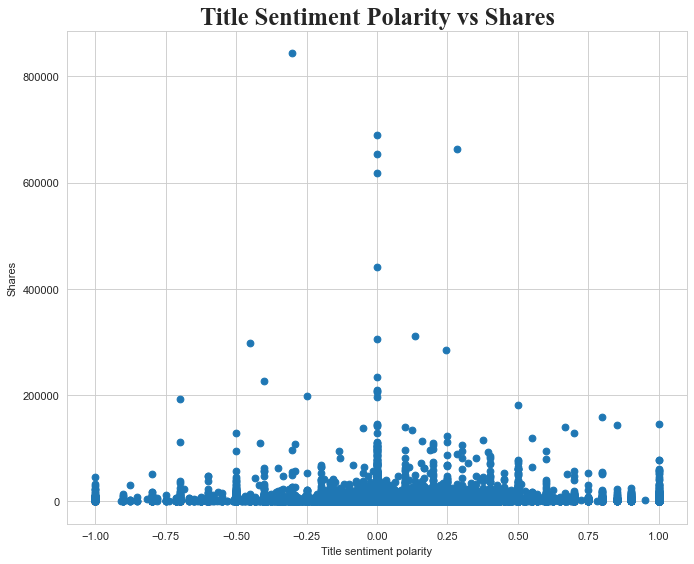

In [35]:
#Scatterplot: Title Sentiment Polarity 
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w')
ax=fig.add_subplot(111)
plt.scatter(online_np['title_sentiment_polarity'],online_np['shares'])
plt.xlabel("Title sentiment polarity")
plt.ylabel("Shares")
plt.title('Title Sentiment Polarity vs Shares', fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.show()

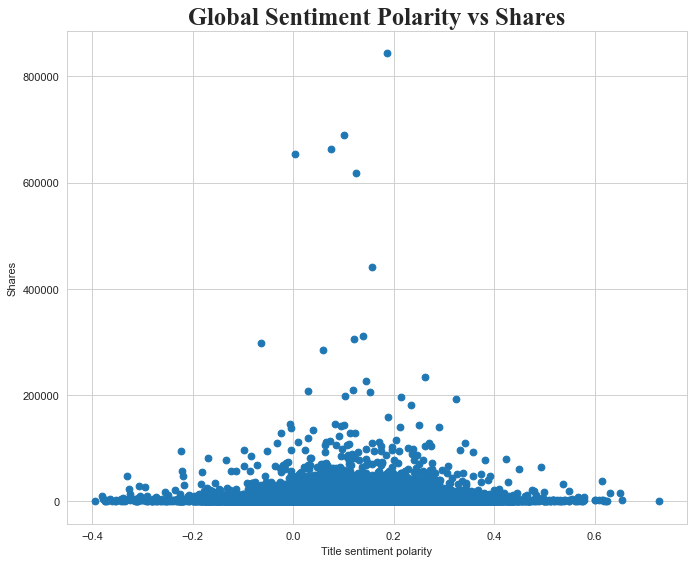

In [36]:
#Scatterplot: Global Sentiment Polarity 
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w')
ax=fig.add_subplot(111)
plt.scatter(online_np['global_sentiment_polarity'],online_np['shares'])
plt.xlabel("Title sentiment polarity")
plt.ylabel("Shares")
plt.title('Global Sentiment Polarity vs Shares', fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.show()

# Summary 

In [ ]:
Began my exploration by quickly looking at each feature. Out of all the weekdays, Tuesday showed a right-skewed distribution. “Max_positive_polarity” and “avg_negative_polarity” both showed unimodal distribution. “Abs_title_sentiment_polarity” and “title_subjectivity” were opposite in distributions; “title_subjectivity” was left-skewed while “abs_title_sentiment_polarity” was right. 

The heat map showed correlations between: 
kw_max_avg and kw_avg_min
avg_negative_polarity and min_negative_polarity
abs_title_sentiment_polarity and title subjectively 
self_refernece_avg_shares and kw_avg_avg 
Data_channel_is_worlds and LDA_02

The mean article share was 3395.380 with the median being 1400.00. The max article share was 843300. Next analyzed the days of the week. To do this I decided to categorize the articles based on popularity using the mean as a scale. Articles that have reached the mean (3395.4) or higher were considered “popular”, and the other articles under this category were categorized as “unpopular”. Tuesday and Wednesday had the highest count of unpopular articles with a count reaching 6,000 each. Saturday had the lowest popular count out of all the days of the week as well as the least unpopular articles. This could have been due to Marshall not posting articles as often as other days of the week. Monday, Tuesday, Wednesday, and Thursday all tied in popular articles. I predicted to look into the channels( genres) of the articles. World articles came in first in unpopular articles reaching over 7000. Tech was first in popular articles with over 1000 articles. Social media was last in both popular(under 1000) and unpopular ( under 2000) articles. 

Next, analyze the context of the articles. I began with the number of words per article. To get as accurate a result as possible, I checked to see if any articles had no words. There were a total of 1,181 articles without words which I dropped. The relationship showed that the shorter the article the more shares. The higher shares were seen in the articles with 2000 or less words. Then proceed to look into the relationship between length of title and shares. Higher shares were seen between articles whose titles were between 8 and 13 words. The number of images per article showed a similar relationship as the number of words per article. The lower number of images showed higher article shares. Higher shares were seen between 0 to 20 images. As expected, the number of videos showed a similar trend as in words per content, and images per article. The higher shares were seen in articles with 0 to 20 videos. 

I proceeded to analyze article shares per year to see if shares have increased or decreased and to see if there were seasonal trends present. In January 2013, there was an increase in shares from January 10th to January 13th. There was a constant between January 20th to January 24th. As well as a decrease in shares at the end of the month. In January 2014, the highest shares were seen in the middle of the month, specifically on January 13th. As in January 2013, January 2014 decreased in shares at the end of the month. 

Next up is LDA. “LDA_02” had the highest count of unpopular articles with over 7000 articles. “LDA_03” has the highest count of popular articles reaching over 2000 articles. All levels of LDA have counts of popular articles 1000 and over.  

The last thing I looked into was article polarity. In title sentiment polarity, the majority of the density was under 2000 shares; with the higher density between -0.25 and 0.50. Global sentiment polarity showed a similar relationship as in title sentiment polarity in which the majority of the density was under 2000 shares. 
